In [ ]:
import numpy as np
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
import itertools
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from IPython.display import clear_output
from sklearn.neighbors import KernelDensity
from tabulate import tabulate
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ANALISIS DE LOS DATOS

In [ ]:
url = '/content/drive/Shareddrives/Simulacion datos/PhishingDB.csv'
data = pd.read_csv(url)
del data["id"]
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
data.shape

(11055, 31)

In [ ]:
data.shape

(11055, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [ ]:
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [ ]:
data.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

Distribución de las clases:

 1    6157
-1    4898
Name: Result, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


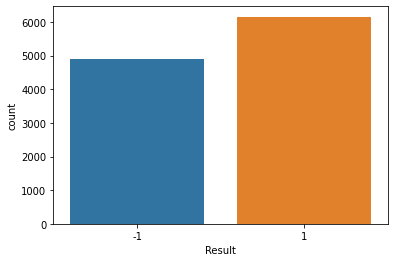

In [ ]:
print(data['Result'].value_counts())
sns.countplot(data['Result'])

Separacion de X y Y:

In [ ]:
X = data.drop('Result', axis=1).values
Y = data['Result'].values
print (X.shape , Y.shape)
#1

(11055, 30) (11055,)


Separacion de test y train: (BORRAR ?)



In [ ]:
#Para pruebas con modelos complicados
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.01, random_state=0)
print (X_test.shape , Y_test.shape)

(111, 30) (111,)


Funcion para graficar matriz de confusion:



In [ ]:
  #NORMALIZAR
  def calcularMatrizCF(matris,titulo):
      a = (matris[0,0] +  matris[0,1])
      b = (matris[1,0] +  matris[1,1])
      matris[0,0] =  matris[0,0] / a
      matris[0,1] =  matris[0,1] / a
      matris[1,0] =  matris[1,0] / b
      matris[1,1] =  matris[1,1] / b
      #MATRIZ DE CONFUSION
      sns.heatmap(matris,annot=True)
      plt.xlabel('Label Predicha')
      plt.ylabel('Label Verdadera')
      plt.title(titulo)
      print(matris)

# GBT (Gradient Boosting Tree)



In [ ]:
def experimentar_gbt(num_trees, X, Y):
    folds = 10
    skf = KFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    conf_matrix_list_of_arrays = np.zeros(2)
    for trees in num_trees:
        ## para almacenar los errores intermedios
        EficienciaTrain = []
        EficienciaVal = []
        accuracy = []
        Macc = []
        Mpre = []
        Mrec = []
        Mf1 = []
        j = 0
        for train, test in skf.split(X, Y):
            Xtrain = X[train,:]
            Ytrain = Y[train]
            Xtest = X[test,:]
            Ytest = Y[test]
            #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
            modelo= GradientBoostingClassifier(n_estimators=trees)
            modelo.fit(Xtrain,Ytrain)
            conf_matrix = confusion_matrix(Ytest, modelo.predict(Xtest))
            conf_matrix_list_of_arrays = conf_matrix_list_of_arrays + conf_matrix
            #predecir muestras de entrenamiento
            Ytrain_pred =  modelo.predict(Xtrain)
            #predecir muestras de pruebas
            Yest = modelo.predict(Xtest)
            #Evaluamos las predicciones del modelo con los datos de test
            EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
            EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))
            accuracy.append(modelo.score(Xtest, Ytest))
            Macc.append(accuracy_score(Ytest, Yest))
            Mpre.append(precision_score(Ytest, Yest))
            Mrec.append(recall_score(Ytest, Yest))
            Mf1.append(f1_score(Ytest, Yest))

        resultados.loc[idx,'número de arboles'] = trees
        resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
        resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
        resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
        resultados.loc[idx,'Intervalo de confianza (prueba)'] = np.std(EficienciaVal)
        resultados.loc[idx,'accuracy real'] = np.mean(Macc)
        resultados.loc[idx,'precision_score'] = np.mean(Mpre)
        resultados.loc[idx,'recall_score'] = np.mean(Mrec)
        resultados.loc[idx,'f1_score'] = np.mean(Mf1)
        idx= idx +1
        
    return (resultados, conf_matrix_list_of_arrays)

In [ ]:
arboles = [5,10,20,50,100, 150, 200, 250]
resultados_gbt, matris = experimentar_gbt(arboles, X, Y)
resultados_gbt

,número de arboles,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,Intervalo de confianza (prueba),accuracy real,precision_score,recall_score,f1_score
0,5.0,0.917142,0.000882,0.917144,0.007938,0.917144,0.923757,0.928126,0.925860
1,10.0,0.917845,0.001978,0.917415,0.008091,0.917415,0.922428,0.930163,0.926221
2,20.0,0.923524,0.000975,0.921666,0.006519,0.921666,0.920521,0.940926,0.930514
3,50.0,0.938871,0.000756,0.936320,0.007357,0.936320,0.933683,0.953583,0.943473
4,100.0,0.952490,0.001077,0.947627,0.006331,0.947627,0.945081,0.962060,0.953454
5,150.0,0.956219,0.000937,0.950250,0.006087,0.950250,0.946736,0.965139,0.955813
6,200.0,0.959918,0.000609,0.951335,0.005570,0.951335,0.947553,0.966241,0.956776
7,250.0,0.962219,0.000877,0.953958,0.004726,0.953958,0.950742,0.967486,0.959013


In [ ]:
arboles = [150]
resultados_gbt, matrisGBT = experimentar_gbt(arboles, X, Y)
resultados_gbt

,número de arboles,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,Intervalo de confianza (prueba),accuracy real,precision_score,recall_score,f1_score
0,150.0,0.956219,0.000937,0.95025,0.006087,0.95025,0.946736,0.965139,0.955813


[[0.93160474 0.06839526]
 [0.0349196  0.9650804 ]]


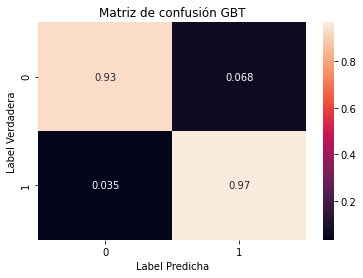

In [ ]:
calcularMatrizCF(matrisGBT, "Matriz de confusión GBT")

# VENTANA DE PARZEN


In [ ]:
import scipy as sc
def kernel_gaussiano(x):
    return np.exp((-0.5)*x**2)

def ParzenWindow(x,Data,h):
    h = h
    Ns = Data.shape[0]
    suma = 0
    for k in range(Ns):
        u = sc.spatial.distance.euclidean(x,Data[k,:])
        suma += kernel_gaussiano(u/h)
    return suma

def parzenClass(X_train, Y_train, X_val, ancho_h):
    h = ancho_h
    Nv = len(X_val)
    Y_est = np.array([])
    
    X_clases = []
    
    for clase in np.unique(Y_train):
        X_clases.append(X_train[np.where(Y_train == clase )])    

    probabilidades = []
    j = 0
    for x_clase in X_clases: 
        distances = sc.spatial.distance_matrix(X_val, x_clase) / h
        
        for i in range(Nv):
            k = kernel_gaussiano(distances[i])
            P = np.sum(k)
            if(j == 0):
                probabilidades.append([P, 0.0, 0.0])
            else:
                probabilidades[i][j] = P
        j += 1   
    
    for p in probabilidades:
        Y_est = np.append(Y_est,p.index(max(p)))
    return Y_est#Debe retornar un vector que contenga las predicciones para cada una de las muestras en X_val, en el mismo orden.  

#ejercicio de codigo
def experimentarParzen (X, Y, hs):
    # se usa la función para implementar la estrategia de validación.
    skf = KFold(n_splits=10)
    resultados = pd.DataFrame()
    idx = 0
    conf_matrix_list_of_arrays = np.zeros(2)
    # iteramos sobre los valores de hs
    for h in hs:
        # lista para almacenar los errores de cada iteración
        # de la validación
        error_temp = []
        Macc = []
        EficienciaVal = []
        Macc = []
        Mpre = []
        Mrec = []
        Mf1 = []
        for train, test in skf.split(X, Y):

            Xtrain = X[train,:]
            Ytrain = Y[train]
            Xtest = X[test,:]
            Ytest = Y[test]
            #normalizamos los datos
            scaler = StandardScaler()
            scaler.fit(Xtrain)
            Xtrain = scaler.transform(Xtrain)
            Xtest = scaler.transform(Xtest)
            Yest = parzenClass(Xtrain,Ytrain,Xtest,h)
            #conf_matrix = confusion_matrix(Ytest, Yest)
            #conf_matrix_list_of_arrays = conf_matrix_list_of_arrays + conf_matrix
            Macc.append(accuracy_score(Ytest, Yest))
            Mpre.append(precision_score(Ytest, Yest, average='micro'))
            Mrec.append(recall_score(Ytest, Yest, average='micro'))
            Mf1.append(f1_score(Ytest, Yest, average='micro'))
            EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))
    
        resultados.loc[idx,'ancho de ventana'] = h 
        resultados.loc[idx,'accuracy real'] = np.mean(Macc)
        resultados.loc[idx,'Intervalo de confianza (prueba)'] = np.std(EficienciaVal)
        resultados.loc[idx,'precision_score'] = np.mean(Mpre)
        resultados.loc[idx,'recall_score'] = np.mean(Mrec)
        resultados.loc[idx,'f1_score'] = np.mean(Mf1)
        idx+=1
    return (resultados, conf_matrix_list_of_arrays)

In [ ]:
hs = [0.05, 0.1, 0.5, 1, 2, 5, 10]
experimentos_parzen, matrisPARZEN = experimentarParzen(X,Y, hs)
experimentos_parzen

,ancho de ventana,accuracy real,Intervalo de confianza (prueba),precision_score,recall_score,f1_score
0,0.05,0.469085,0.059855,0.469085,0.469085,0.469085
1,0.10,0.536674,0.018483,0.536674,0.536674,0.536674
2,0.50,0.543099,0.015997,0.543099,0.543099,0.543099
3,1.00,0.543643,0.013248,0.543643,0.543643,0.543643
4,2.00,0.535595,0.009221,0.535595,0.535595,0.535595
5,5.00,0.556489,0.011398,0.556489,0.556489,0.556489
6,10.00,0.556941,0.011719,0.556941,0.556941,0.556941


In [ ]:
hs = [10]
experimentos_parzen, matrisPARZEN = experimentarParzen(X,Y, hs)
experimentos_parzen

,ancho de ventana,accuracy real,Intervalo de confianza (prueba),precision_score,recall_score,f1_score
0,10.0,0.556941,0.011719,0.556941,0.556941,0.556941


# SVM (Support Vector Machine)

In [ ]:
#ejercicio de código
def experiementarSVC(x, y, kernels, gammas,params_reg):
    idx = 0
    kf = KFold(n_splits=10) 
    # crear una lista con la combinaciones de los elementos de cada list
    kernels_gammas_regs = list(itertools.product(kernels, gammas, params_reg))
    resultados = pd.DataFrame()
    conf_matrix_list_of_arrays = np.zeros(2)
    for params in kernels_gammas_regs:
        kernel, gamma, param_reg = params
        ''' print("parametros usados", params) # puede usar para ver los params '''
        errores_train = []
        errores_test = []
        EficienciaVal = []
        pct_support_vectors = []
        Macc = []
        Mpre = []
        Mrec = []
        Mf1 = []
        for train_index, test_index in kf.split(x,y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]  
            # normalizar los datos
            scaler = StandardScaler().fit(X= X_train)  
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
            svm = SVC(kernel=kernel, gamma=gamma, C= param_reg)
            # Entrenar el modelo
            svm.fit(X=X_train, y=y_train)
            # calculo de errores
            y_train_pred = svm.predict(X=X_train)
            y_test_pred = svm.predict(X=X_test)
            conf_matrix = confusion_matrix(y_test, svm.predict(X_test))
            conf_matrix_list_of_arrays = conf_matrix_list_of_arrays + conf_matrix
            # error y pct de vectores de soporte
            errores_train.append(accuracy_score(y_true = y_train, y_pred = y_train_pred))
            errores_test.append(accuracy_score(y_true = y_test, y_pred = y_test_pred))
            # contar muestras de entrenamiento
            n_train = X_train.shape[0]
            pct_vs = ( svm.support_vectors_.shape[0] /n_train)
            pct_support_vectors.append(pct_vs)
            #ypredict.append((y_test_pred))
            #ytesetes.append((y_test))
            Macc.append(accuracy_score(y_test, y_test_pred))
            Mpre.append(precision_score(y_test, y_test_pred))
            Mrec.append(recall_score(y_test, y_test_pred))
            Mf1.append(f1_score(y_test, y_test_pred))
            EficienciaVal.append(np.mean(y_test_pred.ravel() == y_test.ravel()))

    
        resultados.loc[idx,'kernel'] = kernel
        resultados.loc[idx,'gamma'] = gamma
        resultados.loc[idx,'param_reg'] = param_reg
        resultados.loc[idx,'error de entrenamiento'] = np.mean(errores_train)
        resultados.loc[idx,'error de prueba'] = np.mean(errores_test)
        resultados.loc[idx,'% de vectores de soporte'] = np.mean(pct_support_vectors)*100
        resultados.loc[idx,'accuracy real'] = np.mean(Macc)
        resultados.loc[idx,'Intervalo de confianza (prueba)'] = np.std(EficienciaVal)
        resultados.loc[idx,'precision_score'] = np.mean(Mpre)
        resultados.loc[idx,'recall_score'] = np.mean(Mrec)
        resultados.loc[idx,'f1_score'] = np.mean(Mf1)
        
        idx+=1
    return (resultados, conf_matrix_list_of_arrays)

In [ ]:
# vamos a realizar los experimentos
resultadosSVC, matrisSVM = experiementarSVC(x =X ,y=Y,
                                 kernels=['linear', 'rbf'],
                                 gammas = [0.01,0.1],
                                 params_reg = [0.001, 0.01,0.1, 1,10]
                                )

resultadosSVC


,kernel,gamma,param_reg,error de entrenamiento,error de prueba,% de vectores de soporte,accuracy real,Intervalo de confianza (prueba),precision_score,recall_score,f1_score
0,linear,0.01,0.001,0.921363,0.920489,32.218705,0.920489,0.008488,0.913842,0.946836,0.929987
1,linear,0.01,0.010,0.926097,0.924921,20.756820,0.924921,0.007334,0.918782,0.949391,0.933785
2,linear,0.01,0.100,0.928388,0.927001,18.101412,0.927001,0.006759,0.924212,0.946793,0.935324
3,linear,0.01,1.000,0.928690,0.927001,17.752649,0.927001,0.006541,0.924343,0.946621,0.935304
4,linear,0.01,10.000,0.928609,0.927001,17.704405,0.927001,0.006126,0.924593,0.946294,0.935277
5,linear,0.10,0.001,0.921363,0.920489,32.218705,0.920489,0.008488,0.913842,0.946836,0.929987
6,linear,0.10,0.010,0.926097,0.924921,20.756820,0.924921,0.007334,0.918782,0.949391,0.933785
7,linear,0.10,0.100,0.928388,0.927001,18.101412,0.927001,0.006759,0.924212,0.946793,0.935324
8,linear,0.10,1.000,0.928690,0.927001,17.752649,0.927001,0.006541,0.924343,0.946621,0.935304
9,linear,0.10,10.000,0.928609,0.927001,17.704405,0.927001,0.006126,0.924593,0.946294,0.935277


In [ ]:
# vamos a realizar los experimentos
from sklearn.metrics import recall_score

resultadosSVC, matrisSVM  = experiementarSVC(x = X,y=Y,
                                 kernels=['rbf'],
                                 gammas = [0.01],
                                 params_reg = [10]
                                )
resultadosSVC

,kernel,gamma,param_reg,error de entrenamiento,error de prueba,% de vectores de soporte,accuracy real,Intervalo de confianza (prueba),precision_score,recall_score,f1_score
0,rbf,0.01,10.0,0.959103,0.950881,16.050052,0.950881,0.006395,0.945397,0.967834,0.956457


[[0.92956309 0.07043691]
 [0.03215852 0.96784148]]


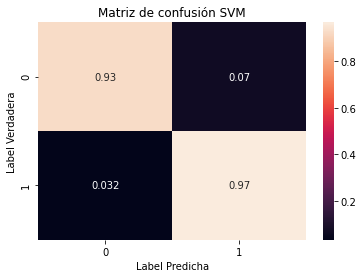

In [ ]:
calcularMatrizCF(matrisSVM, "Matriz de confusión SVM")


# MLP (Multi Layer Perceptron)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix


In [ ]:
#import warnings
def experimetar_mlpc(X,Y, num_hidden_layers, num_neurons):
    #warnings.filterwarnings("ignore")
    #Validamos el modelo
    Folds = 10
    skf = KFold(n_splits=Folds)
    resultados = pd.DataFrame()
    idx = 0
    for hidden_layers in num_hidden_layers:
        #Macc = []
        #Mpre = []
        #Mrec = []
        #Mf1 = []
        for neurons in num_neurons:
            Macc = []
            Mpre = []
            Mrec = []
            Mf1 = []
            EficienciaVal = []
            for j, (train, test) in enumerate(skf.split(X, Y)):
                # para almacenar errores intermedios
                Error = np.zeros(Folds)
                Xtrain= X[train,:]
                Ytrain = Y[train]
                Xtest = X[test, :]
                Ytest = Y[test]
                #Normalizamos los datos
                scaler = StandardScaler().fit(X= Xtrain)       
                Xtrain = scaler.transform(Xtrain)
                Xtest = scaler.transform(Xtest)
                #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
                # prestar atención a los parametros, correctos.
                hidden_layer_sizes = tuple(hidden_layers * [neurons])
                #print(hidden_layer_sizes)
                mlp = MLPClassifier(activation='tanh', hidden_layer_sizes= hidden_layer_sizes, max_iter= 1000)
                # entrenar el MLP
                mlp.fit(X=Xtrain, y=Ytrain)
                #Use para el modelo para hacer predicciones sobre el conjunto Xtest
                Yest = mlp.predict(Xtest)
                #Mida el error absoluto medio para cada una de las dos salidas
                #Observe bien la documentación. recordar que esta resolviendo
                # un problema de multiples salidas
                #Error[j] = accuracy_score(Ytest, Yest)
                Macc.append(accuracy_score(Ytest, Yest))
                Mpre.append(precision_score(Ytest, Yest))
                Mrec.append(recall_score(Ytest, Yest))
                Mf1.append(f1_score(Ytest, Yest))
                EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))

            resultados.loc[idx,'capas ocultas'] = hidden_layers
            resultados.loc[idx,'neuronas en capas ocultas'] = neurons 
            resultados.loc[idx,'accuracy real'] = np.mean(Macc)
            resultados.loc[idx,'Intervalo de confianza (prueba)'] = np.std(EficienciaVal)
            resultados.loc[idx,'precision_score'] = np.mean(Mpre)
            resultados.loc[idx,'recall_score'] = np.mean(Mrec)
            resultados.loc[idx,'f1_score'] = np.mean(Mf1)

            idx+=1
    return (resultados)

In [ ]:
resultados_mlpc = experimetar_mlpc(X, Y, [1,2,12,20], [12,16,20,24,30,40,50])
resultados_mlpc

,capas ocultas,neuronas en capas ocultas,accuracy real,Intervalo de confianza (prueba),precision_score,recall_score,f1_score
0,1.0,12.0,0.959743,0.012058,0.959797,0.968466,0.964065
1,1.0,16.0,0.962003,0.013650,0.960874,0.971467,0.966081
2,1.0,20.0,0.963541,0.014993,0.961467,0.973839,0.967542
3,1.0,24.0,0.967611,0.012893,0.963162,0.979353,0.971150
4,1.0,30.0,0.968335,0.012270,0.966155,0.977587,0.971785
5,1.0,40.0,0.968154,0.013052,0.964196,0.979368,0.971672
6,1.0,50.0,0.969240,0.011744,0.966362,0.978858,0.972532
7,2.0,12.0,0.957842,0.014764,0.956208,0.968889,0.962431
8,2.0,16.0,0.967792,0.013963,0.964128,0.978708,0.971303
9,2.0,20.0,0.967250,0.011596,0.963503,0.978185,0.970751


In [ ]:
resultados_mlpc = experimetar_mlpc(X, Y, [2], [40])
resultados_mlpc

,capas ocultas,neuronas en capas ocultas,accuracy real,Intervalo de confianza (prueba),precision_score,recall_score,f1_score
0,2.0,40.0,0.968878,0.01142,0.966846,0.977728,0.972202


[[0.95467538 0.04532462]
 [0.02176385 0.97823615]]


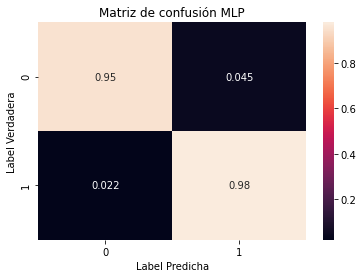

In [ ]:
calcularMatrizCF(matrisMLP, "Matriz de confusión MLP")

# RF (Random Forest)


In [ ]:
#ejercicio de código
def experimentar_rf(num_trees,numero_de_variables, X, Y):
    folds = 10
    skf = KFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    conf_matrix_list_of_arrays = np.zeros(2)
    for trees in num_trees:
        for num_variables in numero_de_variables:
            ## para almacenar los errores intermedios
            EficienciaTrain = []
            EficienciaVal = []
            Macc = []
            Mpre = []
            Mrec = []
            Mf1 = []
            for train, test in skf.split(X, Y):
                Xtrain = X[train,:]
                Ytrain = Y[train]
                Xtest = X[test,:]
                Ytest = Y[test]
                #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
                modelo = RandomForestClassifier(n_estimators=trees, max_features=num_variables, criterion="gini")
                modelo.fit(Xtrain,Ytrain)
                #predecir muestras de entrenamiento
                Ytrain_pred = modelo.predict(Xtrain)
                #predecir muestras de pruebas
                Yest = modelo.predict(Xtest)
                #Evaluamos las predicciones del modelo con los datos de test
                EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
                EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))
                conf_matrix = confusion_matrix(Ytest, modelo.predict(Xtest))
                conf_matrix_list_of_arrays = conf_matrix_list_of_arrays + conf_matrix
                Macc.append(accuracy_score(Ytest, Yest))
                Mpre.append(precision_score(Ytest, Yest))
                Mrec.append(recall_score(Ytest, Yest))
                Mf1.append(f1_score(Ytest, Yest))



            resultados.loc[idx,'número de arboles'] = trees
            resultados.loc[idx,'variables para la selección del mejor umbral'] = num_variables
            resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
            resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
            resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
            resultados.loc[idx,'Intervalo de confianza (prueba)'] = np.std(EficienciaVal)
            resultados.loc[idx,'accuracy real'] = np.mean(Macc)
            resultados.loc[idx,'precision_score'] = np.mean(Mpre)
            resultados.loc[idx,'recall_score'] = np.mean(Mrec)
            resultados.loc[idx,'f1_score'] = np.mean(Mf1)
            idx= idx +1
        print(f"termina para {trees} arboles")
        
    return (resultados, conf_matrix_list_of_arrays)

In [ ]:
arboles = [5,10,20,50,100, 150]
variables_seleccion = [5,10,15,20,25]
resultados_rf, matrisRF= experimentar_rf(arboles, variables_seleccion, X, Y)
resultados_rf

termina para 5 arboles
termina para 10 arboles
termina para 20 arboles
termina para 50 arboles
termina para 100 arboles
termina para 150 arboles


,número de arboles,variables para la selección del mejor umbral,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,Intervalo de confianza (prueba),accuracy real,precision_score,recall_score,f1_score
0,5.0,5.0,0.987567,0.000672,0.967703,0.012349,0.967703,0.963868,0.978969,0.971288
1,5.0,10.0,0.987467,0.000924,0.966977,0.014879,0.966977,0.964771,0.976464,0.970527
2,5.0,15.0,0.987597,0.000403,0.966797,0.014207,0.966797,0.964674,0.976317,0.970380
3,5.0,20.0,0.987296,0.000599,0.969060,0.010971,0.969060,0.967212,0.977760,0.972411
4,5.0,25.0,0.987587,0.000176,0.967250,0.012766,0.967250,0.965573,0.976143,0.970763
5,10.0,5.0,0.989246,0.000436,0.970597,0.012062,0.970597,0.968560,0.979079,0.973737
6,10.0,10.0,0.989105,0.000400,0.970778,0.011917,0.970778,0.968131,0.979854,0.973900
7,10.0,15.0,0.989035,0.000507,0.969240,0.012631,0.969240,0.967482,0.977748,0.972535
8,10.0,20.0,0.989135,0.000393,0.969149,0.013267,0.969149,0.966892,0.978246,0.972462
9,10.0,25.0,0.989035,0.000316,0.969421,0.012388,0.969421,0.968857,0.976653,0.972684


In [ ]:
arboles = [50]
variables_seleccion = [5]
resultados_rf, matrisRF = experimentar_rf(arboles, variables_seleccion, X, Y)
resultados_rf

termina para 50 arboles


,número de arboles,variables para la selección del mejor umbral,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,Intervalo de confianza (prueba),accuracy real,precision_score,recall_score,f1_score
0,50.0,5.0,0.989879,0.000305,0.972135,0.01103,0.972135,0.968366,0.982164,0.975172


[[0.95957534 0.04042466]
 [0.01786584 0.98213416]]


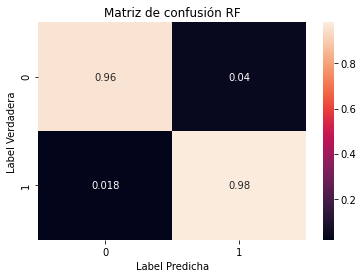

In [ ]:
calcularMatrizCF(matrisRF, "Matriz de confusión RF")

# ANALISIS DISCRIMINATIVO CUADRATICO


In [ ]:
#ejercicio de código
def experiementarQDA(x, y, params_reg,tol):

    idx = 0
    kf = KFold(n_splits=10) 
    # crear una lista con la combinaciones de los elementos de cada list
    resultados = pd.DataFrame()
    tol_regs = list(itertools.product(tol ,params_reg))
    conf_matrix_list_of_arrays = np.zeros(2)
    for params in tol_regs:
        tol, param_reg = params
        errores_train = []
        errores_test = []
        pct_support_vectors = []
        EficienciaVal = []
        Macc = []
        Mpre = []
        Mrec = []
        Mf1 = []
        for train_index, test_index in kf.split(x,y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]  
            # normalizar los datos
            scaler = StandardScaler().fit(X= X_train)  
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
            clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=param_reg, tol=tol) 
            # Entrenar el modelo
            clf.fit(X_train, y_train)
            # calculo de errores
            y_test_pred = clf.predict(X_test)
            y_train_pred = clf.predict(X_train)
            conf_matrix = confusion_matrix(y_test, y_test_pred)
            conf_matrix_list_of_arrays = conf_matrix_list_of_arrays + conf_matrix
            # error y pct de vectores de soporte
            errores_train.append(accuracy_score(y_true = y_train, y_pred = y_train_pred))
            errores_test.append(accuracy_score(y_true = y_test, y_pred = y_test_pred))
            # contar muestras de entrenamiento
            #ypredict.append((y_test_pred))
            #ytesetes.append((y_test))
            Macc.append(accuracy_score(y_test, y_test_pred))
            Mpre.append(precision_score(y_test, y_test_pred))
            Mrec.append(recall_score(y_test, y_test_pred))
            EficienciaVal.append(np.mean(y_test_pred.ravel() == y_test.ravel()))
            Mf1.append(f1_score(y_test, y_test_pred))
            clear_output(wait=True)

    

        resultados.loc[idx,'param_reg'] = param_reg
        resultados.loc[idx,'tol'] = tol
        resultados.loc[idx,'error de entrenamiento'] = np.mean(errores_train)
        resultados.loc[idx,'error de prueba'] = np.mean(errores_test)
        resultados.loc[idx,'accuracy real'] = np.mean(Macc)
        resultados.loc[idx,'Intervalo de confianza (prueba)'] = np.std(EficienciaVal)
        resultados.loc[idx,'precision_score'] = np.mean(Mpre)
        resultados.loc[idx,'recall_score'] = np.mean(Mrec)
        resultados.loc[idx,'f1_score'] = np.mean(Mf1)
        
        idx+=1
    return (resultados, conf_matrix_list_of_arrays)

In [ ]:
resultadosQDA, matrisQDA = experiementarQDA(x =X ,y=Y,params_reg = [0.001, 0.01,0.1,0.2,0.3,0.4,0.5, 1],
                                 tol = [1]
                                )

resultadosQDA

,param_reg,tol,error de entrenamiento,error de prueba,accuracy real,Intervalo de confianza (prueba),precision_score,recall_score,f1_score
0,0.001,1.0,0.878486,0.871467,0.871467,0.016607,0.979737,0.785913,0.871776
1,0.010,1.0,0.903583,0.897878,0.897878,0.011073,0.964103,0.848514,0.902436
2,0.100,1.0,0.919795,0.915878,0.915878,0.009351,0.945142,0.901379,0.922670
3,0.200,1.0,0.924318,0.919496,0.919496,0.008692,0.940914,0.912873,0.926612
4,0.300,1.0,0.926559,0.923295,0.923295,0.007052,0.939136,0.922144,0.930503
5,0.400,1.0,0.927514,0.923746,0.923746,0.006417,0.936192,0.926346,0.931173
6,0.500,1.0,0.927132,0.924198,0.924198,0.004581,0.932425,0.931517,0.931909
7,1.000,1.0,0.912408,0.909542,0.909542,0.006123,0.910001,0.929872,0.919682


In [ ]:
resultadosQDA, matrisQDA = experiementarQDA(x =X ,y=Y,params_reg = [0.4],
                                 tol = [1]
                                )

resultadosQDA

,param_reg,tol,error de entrenamiento,error de prueba,accuracy real,Intervalo de confianza (prueba),precision_score,recall_score,f1_score
0,0.4,1.0,0.927514,0.923746,0.923746,0.006417,0.936192,0.926346,0.931173


[[0.92057983 0.07942017]
 [0.07373721 0.92626279]]


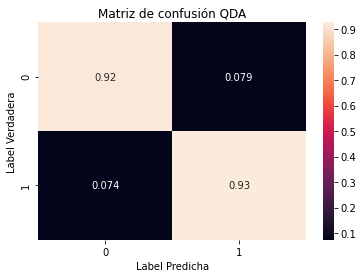

In [ ]:
calcularMatrizCF(matrisQDA, "Matriz de confusión QDA")

# Fisher

In [ ]:
def fisher_index(X, plot=True):
    C = X.shape[1]
    indexes = np.zeros(30)

    j = 0
    for i in range(C):
        if_j = 0
        for k in range(C):
            if i == k:
                continue
            mean_i = np.mean(X[:,i])
            mean_k = np.mean(X[:,k])
            std_i = np.std(X[:,i])
            std_k = np.std(X[:,k])

            if_j += ((mean_i - mean_k)**2 )/(std_i**2 + std_k**2)
        indexes[j] = if_j
        j += 1

    indexes = indexes / np.max(indexes)
  
    if plot == True:
        x = np.array(np.linspace(0, C, C))
        y = indexes
        plt.stem(x, y)
        plt.xlabel('Variables')
        plt.ylabel('Índice de fisher')
        plt.show()    
    return indexes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


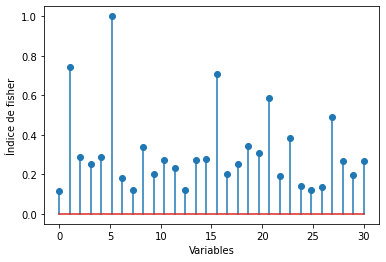

array([0.11432823, 0.7443279 , 0.2855361 , 0.25051737, 0.2882878 ,
       1.        , 0.17944489, 0.1233251 , 0.33648393, 0.19983022,
       0.2752413 , 0.23051129, 0.11851811, 0.27486757, 0.27835047,
       0.70620837, 0.20405376, 0.25448533, 0.34135898, 0.3104852 ,
       0.58563319, 0.19121134, 0.38263848, 0.13954604, 0.11915269,
       0.13612598, 0.48906469, 0.26894946, 0.19470889, 0.26711878])

In [ ]:
fisher_index(X)

otro Fisher

In [ ]:
def fisherr_index(X, plot=True):
    C = X.shape[1]
    indexes = np.zeros(30)

    j = 0
    for i in range(C):
        if_j = 0
        for k in range(C):
            if i == k:
                continue
            mean_i = np.mean(X[:,i])
            mean_k = np.mean(X[:,k])
            std_i = np.std(X[:,i])
            std_k = np.std(X[:,k])

            if_j += ((mean_i - mean_k)**2 )/(std_i**2 + std_k**2)
        indexes[j] = if_j
        j += 1

    indexes = indexes / np.max(indexes)
  
    if plot == True:
        x = np.array(np.linspace(0, C, C))
        y = indexes
        plt.stem(x, y)
        plt.xlabel('Variables')
        plt.ylabel('Índice de fisher')
        plt.show()    
    return indexes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


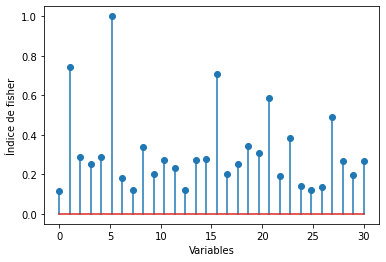

array([0.11432823, 0.7443279 , 0.2855361 , 0.25051737, 0.2882878 ,
       1.        , 0.17944489, 0.1233251 , 0.33648393, 0.19983022,
       0.2752413 , 0.23051129, 0.11851811, 0.27486757, 0.27835047,
       0.70620837, 0.20405376, 0.25448533, 0.34135898, 0.3104852 ,
       0.58563319, 0.19121134, 0.38263848, 0.13954604, 0.11915269,
       0.13612598, 0.48906469, 0.26894946, 0.19470889, 0.26711878])

In [ ]:
fisherr_index(X)

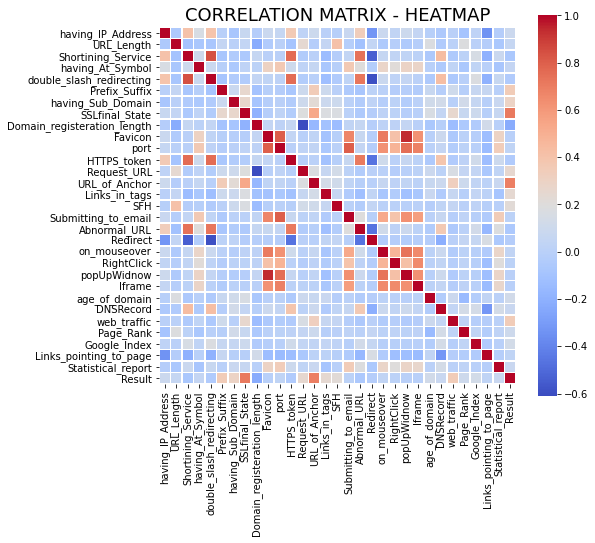

In [ ]:
#  looking at correlations matrix, defined via Pearson function  
corr = data.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

Matriz de correlacion:

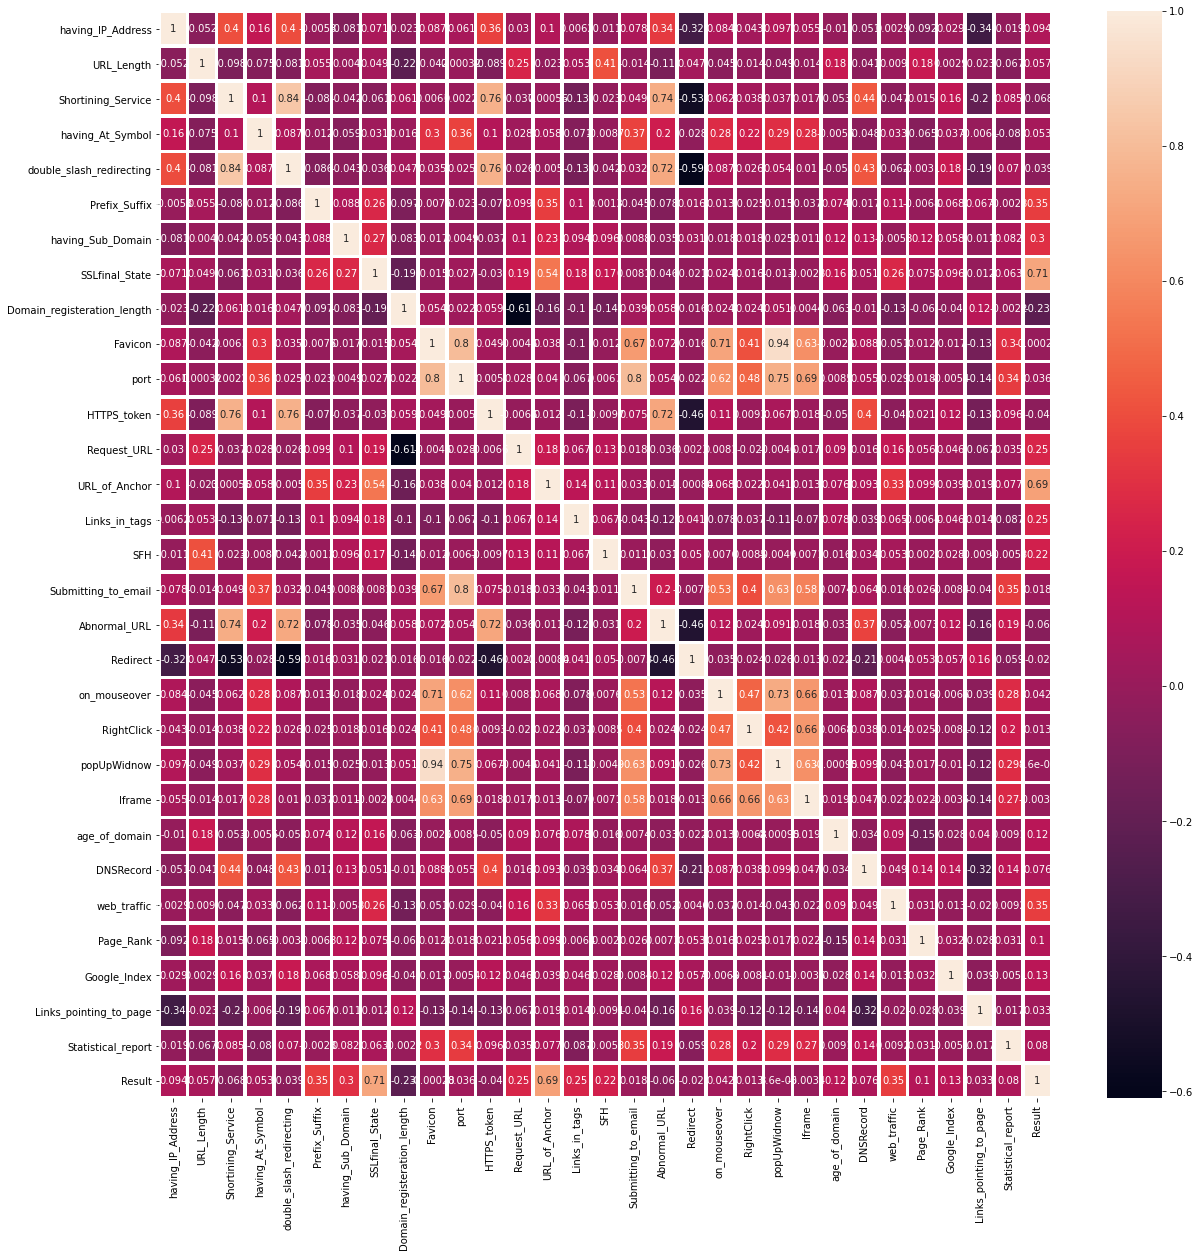

In [ ]:
corr = data.corr()
fig,ax= plt.subplots(figsize=(20,20))
sns.heatmap(corr,annot=True,linewidth=2.5,ax=ax)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
valores = f_classif( X , Y )
print(valores)

X_new = SelectKBest(f_classif, k=26).fit(X, Y)
caracteristicas=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
atrib = X_new.get_support()
params=X_new.get_params()
atributos = [caracteristicas[i] for i in list(atrib.nonzero()[0])]
print(atrib)
atributos

(array([9.88738910e+01, 3.65752191e+01, 5.12947635e+01, 3.10738508e+01,
       1.64996172e+01, 1.52904344e+03, 1.07977853e+03, 1.15435705e+04,
       5.93762202e+02, 8.63615779e-04, 1.46794252e+01, 1.75837733e+01,
       7.58253010e+02, 1.02092399e+04, 7.25777602e+02, 5.69825002e+02,
       3.68216614e+00, 4.05887211e+01, 4.47331565e+00, 1.93817066e+01,
       1.76991679e+00, 8.15329090e-05, 1.27287860e-01, 1.65602039e+02,
       6.37342109e+01, 1.50419302e+03, 1.22376589e+02, 1.86899510e+02,
       1.17403410e+01, 7.09384162e+01]), array([3.36748822e-023, 1.51636985e-009, 8.45398042e-013, 2.54221526e-008,
       4.89959389e-005, 2.26899384e-313, 4.91845052e-226, 0.00000000e+000,
       8.62648646e-128, 9.76556200e-001, 1.28134936e-004, 2.77067436e-005,
       1.68006812e-161, 0.00000000e+000, 6.95866379e-155, 7.62556416e-123,
       5.50230799e-002, 1.95357594e-010, 3.44504376e-002, 1.08032432e-005,
       1.83419824e-001, 9.92795716e-001, 7.21267631e-001, 1.25817957e-037,
       1.56

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

# Seleccion caracteristicas


Probando Forward y Backward con el modelo SVC

Sequential Forward Selection (SFS):

In [ ]:

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

resultadosCaracteristicas = pd.DataFrame()
caracteristicas = [15,20,26,27,28,29,30]
indexx = 0
for carac in caracteristicas:
    svm = SVC(kernel='rbf', gamma=0.01, C= 10)
    # Sequential Forward Selection
    sfs = SFS(svm, 
              k_features=carac, 
              forward=True, 
              floating=False, 
              scoring='accuracy',
              cv=10,
              n_jobs=-1)
    sfs = sfs.fit(X,Y)
    resultadosCaracteristicas.loc[indexx,'Nombre'] = "Sequential Forward Selection"
    resultadosCaracteristicas.loc[indexx,'caracteristicas'] = carac
    resultadosCaracteristicas.loc[indexx,'caracteristicas elegidas'] = str(sfs.k_feature_idx_)
    resultadosCaracteristicas.loc[indexx,'CV score'] = sfs.k_score_
    indexx+=1

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


    Nombre                          caracteristicas  caracteristicas elegidas                                                                                          CV score
--  ----------------------------  -----------------  --------------------------------------------------------------------------------------------------------------  ----------
 0  Sequential Forward Selection                 15  (1, 2, 5, 6, 7, 8, 12, 13, 14, 15, 16, 18, 25, 27, 28)                                                            0.934329
 1  Sequential Forward Selection                 20  (0, 1, 2, 5, 6, 7, 8, 12, 13, 14, 15, 16, 18, 19, 23, 24, 25, 26, 27, 28)                                         0.942198
 2  Sequential Forward Selection                 26  (0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28)                  0.945182
 3  Sequential Forward Selection                 27  (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,

 Sequential Backward Selection (SBS):

In [ ]:

resultadosCaracteristicas = pd.DataFrame()
caracteristicas = [15,20,26,27,28,29,30]
indexx = 0


svm = SVC(kernel='rbf', gamma=0.01, C= 10)
# Sequential Backward Selection
for carac in caracteristicas:
    sbs = SFS(svm, 
              k_features=carac, 
              forward=False, 
              floating=False, 
              scoring='accuracy',
              cv=10,
              n_jobs=-1)
    sbs = sbs.fit(X,Y)
    resultadosCaracteristicas.loc[indexx,'Nombre'] = "Sequential Backward Selection"
    resultadosCaracteristicas.loc[indexx,'caracteristicas'] = carac
    resultadosCaracteristicas.loc[indexx,'caracteristicas elegidas'] = str(sbs.k_feature_idx_)
    resultadosCaracteristicas.loc[indexx,'CV score'] = sbs.k_score_
    indexx+=1
###################################################


print(tabulate(resultadosCaracteristicas, headers='keys', tablefmt='asciitable'))

    Nombre                           caracteristicas  caracteristicas elegidas                                                                                          CV score
--  -----------------------------  -----------------  --------------------------------------------------------------------------------------------------------------  ----------
 0  Sequential Backward Selection                 15  (0, 1, 5, 6, 7, 8, 13, 14, 15, 16, 23, 24, 25, 27, 28)                                                            0.937856
 1  Sequential Backward Selection                 20  (0, 1, 2, 3, 5, 6, 7, 8, 13, 14, 15, 16, 19, 23, 24, 25, 26, 27, 28, 29)                                          0.942379
 2  Sequential Backward Selection                 26  (0, 1, 2, 3, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29)                  0.945273
 3  Sequential Backward Selection                 27  (0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 

Sequential Forward Floating Selection (SFFS):

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
###################################################
from tabulate import tabulate
resultadosCaracteristicas = pd.DataFrame()
caracteristicas = [26,27,28,29]
indexx = 0
# Sequential Forward Floating Selection
for carac in caracteristicas:
    svm = SVC(kernel='rbf', gamma=0.01, C= 10)
    sffs = SFS(svm, 
              k_features=carac, 
              forward=True, 
              floating=True, 
              scoring='accuracy',
              cv=10,
              n_jobs=-1)
    sffs = sffs.fit(X,Y)
    resultadosCaracteristicas.loc[indexx,'Nombre'] = "Sequential Forward Floating Selection"
    resultadosCaracteristicas.loc[indexx,'caracteristicas'] = carac
    resultadosCaracteristicas.loc[indexx,'caracteristicas elegidas'] = str(sffs.k_feature_idx_)
    resultadosCaracteristicas.loc[indexx,'CV score'] = sffs.k_score_
    indexx+=1
print(tabulate(resultadosCaracteristicas, headers='keys', tablefmt='asciitable'))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

    Nombre                                   caracteristicas  caracteristicas elegidas                                                                               CV score
--  -------------------------------------  -----------------  ---------------------------------------------------------------------------------------------------  ----------
 0  Sequential Forward Floating Selection                 26  (0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28)       0.945182
 1  Sequential Forward Floating Selection                 27  (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28)    0.945273
 2  Sequential Forward Floating Selection                 28  (0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 24, 25, 27, 28)                    0.941565
 3  Sequential Forward Floating Selection                 29  ()                                                                  


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

Debido al tiempo de ejecucion, se realizan el 28 y 29 SFFS para SVC de manera independiente


Para 28 caracteristicas:

In [ ]:
    svm = SVC(kernel='rbf', gamma=0.01, C= 10)
    sffs = SFS(svm, 
              k_features=28, 
              forward=True, 
              floating=True, 
              scoring='accuracy',
              cv=10,
              n_jobs=-1)
    sffs = sffs.fit(X,Y)
resultadosCaracteristicas = pd.DataFrame()
resultadosCaracteristicas.loc[0,'Nombre'] = "Sequential Forward Floating Selection"
resultadosCaracteristicas.loc[0,'caracteristicas'] = 28
resultadosCaracteristicas.loc[0,'caracteristicas elegidas'] = str(sffs.k_feature_idx_)
resultadosCaracteristicas.loc[0,'CV score'] = sffs.k_score_
print(tabulate(resultadosCaracteristicas, headers='keys', tablefmt='asciitable'))

    Nombre                                   caracteristicas  caracteristicas elegidas                                                                                   CV score
--  -------------------------------------  -----------------  -------------------------------------------------------------------------------------------------------  ----------
 0  Sequential Forward Floating Selection                 28  (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28)    0.945183


Para 29 caracteristicas:

In [ ]:
    svm = SVC(kernel='rbf', gamma=0.01, C= 10)
    sffs = SFS(svm, 
              k_features=29, 
              forward=True, 
              floating=True, 
              scoring='accuracy',
              cv=10,
              n_jobs=-1)
    sffs = sffs.fit(X,Y)


In [ ]:
resultadosCaracteristicas = pd.DataFrame()
resultadosCaracteristicas.loc[0,'Nombre'] = "Sequential Forward Floating Selection"
resultadosCaracteristicas.loc[0,'caracteristicas'] = 29
resultadosCaracteristicas.loc[0,'caracteristicas elegidas'] = str(sffs.k_feature_idx_)
resultadosCaracteristicas.loc[0,'CV score'] = sffs.k_score_
print(tabulate(resultadosCaracteristicas, headers='keys', tablefmt='asciitable'))

    Nombre                                   caracteristicas  caracteristicas elegidas                                                                                       CV score
--  -------------------------------------  -----------------  -----------------------------------------------------------------------------------------------------------  ----------
 0  Sequential Forward Floating Selection                 29  (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29)    0.945725


Sequential Backward Floating Selection (SBFS):


SVM (SBFS):

In [ ]:
###################################################
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from tabulate import tabulate
resultadosCaracteristicas = pd.DataFrame()
caracteristicas = [26,27,28,29]
indexx = 0
# Sequential Backward Floating Selection
for carac in caracteristicas:
    svm = SVC(kernel='rbf', gamma=0.01, C= 10)
    sbfs = SFS(svm, 
              k_features=carac, 
              forward=False, 
              floating=True, 
              scoring='accuracy',
              cv=10,
              n_jobs=-1)
    sbfs = sbfs.fit(X,Y)
    resultadosCaracteristicas.loc[indexx,'Nombre'] = "Sequential Backward Floating Selection"
    resultadosCaracteristicas.loc[indexx,'caracteristicas'] = carac
    resultadosCaracteristicas.loc[indexx,'caracteristicas elegidas'] = str(sbfs.k_feature_idx_)
    resultadosCaracteristicas.loc[indexx,'CV score'] = sbfs.k_score_
    indexx+=1
print(tabulate(resultadosCaracteristicas, headers='keys', tablefmt='asciitable'))

    Nombre                                    caracteristicas  caracteristicas elegidas                                                                                       CV score
--  --------------------------------------  -----------------  -----------------------------------------------------------------------------------------------------------  ----------
 0  Sequential Backward Floating Selection                 26  (0, 1, 2, 3, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29)               0.945273
 1  Sequential Backward Floating Selection                 27  (0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29)           0.945273
 2  Sequential Backward Floating Selection                 28  (0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29)       0.945635
 3  Sequential Backward Floating Selection                 29  (0, 1, 2, 3, 4, 5, 6, 

RANDOM FOREST (SBFS):

In [ ]:
########################Sequential Backward Floating Selection
###################################################
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from tabulate import tabulate
resultadosCaracteristicas = pd.DataFrame()
caracteristicas = [26,27,28,29]
indexx = 0
# Sequential Backward Floating Selection
for carac in caracteristicas:
    rf = RandomForestClassifier(n_estimators=50, max_features=5, criterion="gini")
    sbfs = SFS(rf, 
              k_features=carac, 
              forward=False, 
              floating=True, 
              scoring='accuracy',
              cv=10,
              n_jobs=-1)
    sbfs = sbfs.fit(X,Y)
    resultadosCaracteristicas.loc[indexx,'Nombre'] = "Sequential Backward Floating Selection"
    resultadosCaracteristicas.loc[indexx,'caracteristicas'] = carac
    resultadosCaracteristicas.loc[indexx,'caracteristicas elegidas'] = str(sbfs.k_feature_idx_)
    resultadosCaracteristicas.loc[indexx,'CV score'] = sbfs.k_score_
    indexx+=1
print(tabulate(resultadosCaracteristicas, headers='keys', tablefmt='asciitable'))

    Nombre                                    caracteristicas  caracteristicas elegidas                                                                                       CV score
--  --------------------------------------  -----------------  -----------------------------------------------------------------------------------------------------------  ----------
 0  Sequential Backward Floating Selection                 26  (0, 1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29)               0.972859
 1  Sequential Backward Floating Selection                 27  (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29)            0.972769
 2  Sequential Backward Floating Selection                 28  (0, 1, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29)       0.973673
 3  Sequential Backward Floating Selection                 29  (0, 1, 2, 4, 5, 6, 7, 

In [ ]:
########################Sequential Backward Floating Selection
###################################################
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from tabulate import tabulate
resultadosCaracteristicas = pd.DataFrame()
caracteristicas = [30]
indexx = 0
# Sequential Backward Floating Selection
for carac in caracteristicas:
    rf = RandomForestClassifier(n_estimators=50, max_features=5, criterion="gini")
    sbfs = SFS(rf, 
              k_features=carac, 
              forward=False, 
              floating=True, 
              scoring='accuracy',
              cv=2,
              n_jobs=-1)
    sbfs = sbfs.fit(X_test,Y_test)
    resultadosCaracteristicas.loc[indexx,'Nombre'] = "Sequential Backward Floating Selection"
    resultadosCaracteristicas.loc[indexx,'caracteristicas'] = carac
    resultadosCaracteristicas.loc[indexx,'caracteristicas elegidas'] = str(sbfs.k_feature_idx_)
    resultadosCaracteristicas.loc[indexx,'CV score'] = sbfs.k_score_
    indexx+=1
print(tabulate(resultadosCaracteristicas, headers='keys', tablefmt='asciitable'))

    Nombre                                    caracteristicas  caracteristicas elegidas                                                                                          CV score
--  --------------------------------------  -----------------  --------------------------------------------------------------------------------------------------------------  ----------
 0  Sequential Backward Floating Selection                 30  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29)           0


In [ ]:
sbfs.est_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

MLP (SBFS):

In [ ]:
########################Sequential Backward Floating Selection 
###################################################
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from tabulate import tabulate
resultadosCaracteristicas = pd.DataFrame()
caracteristicas = [26,27,28,29]
indexx = 0
# Sequential Backward Floating Selection
for carac in caracteristicas:
    hidden_layer_sizes = tuple(2 * [40])
    mlp = MLPClassifier(activation='tanh', hidden_layer_sizes= hidden_layer_sizes, max_iter= 1000)
    sbfs = SFS(mlp, 
              k_features=carac, 
              forward=False, 
              floating=True, 
              scoring='accuracy',
              cv=10,
              n_jobs=-1)
    sbfs = sbfs.fit(X,Y)
    resultadosCaracteristicas.loc[indexx,'Nombre'] = "Sequential Backward Floating Selection"
    resultadosCaracteristicas.loc[indexx,'caracteristicas'] = carac
    resultadosCaracteristicas.loc[indexx,'caracteristicas elegidas'] = str(sbfs.k_feature_idx_)
    resultadosCaracteristicas.loc[indexx,'CV score'] = sbfs.k_score_
    indexx+=1
print(tabulate(resultadosCaracteristicas, headers='keys', tablefmt='asciitable'))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


    Nombre                                    caracteristicas  caracteristicas elegidas                                                                                      CV score
--  --------------------------------------  -----------------  ----------------------------------------------------------------------------------------------------------  ----------
 0  Sequential Backward Floating Selection                 26  (0, 1, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29)               0.969331
 1  Sequential Backward Floating Selection                 27  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24, 25, 26, 27, 28, 29)            0.970417
 2  Sequential Backward Floating Selection                 28  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28)        0.970779
 3  Sequential Backward Floating Selection                 29  (0, 1, 2, 3, 4, 5, 6, 7, 8,

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
rf = RandomForestClassifier(n_estimators=50, max_features=5, criterion="gini")

sfs = SFS(rf, 
          k_features=30, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=-1)
sfs = sfs.fit(X_test, Y_test)

print('\nSequential Forward Selection (k=29):')
print(sfs.k_feature_idx_)
print(sfs.k_feature_names_)
print('CV Score:')
print(sfs.k_score_)

/usr/local/lib/python3.6/dist-packages/mlxtend/feature_selection/sequential_feature_selector.py:510: RuntimeWarning: Mean of empty slice
  all_avg_scores.append(np.nanmean(cv_scores))



Sequential Forward Selection (k=29):
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29)
('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29')
CV Score:
0.9107142857142857


In [ ]:
data.columns.get_loc("Favicon") 

9

MEDIDAS DE DESEMPEÑO PARA LOS MEJORES ACCURACY DE LOS 3 MEJORES MODELOS


PARA SVM:

In [ ]:
X_svm_sbfs = data.drop(["Favicon", "Result"], axis=1).values
print (X_svm_sbfs.shape , Y.shape)


(11055, 29) (11055,)


In [ ]:
resultadosSVC, other = experiementarSVC(x = X_svm_sbfs,y=Y,
                                 kernels=['rbf'],
                                 gammas = [0.01],
                                 params_reg = [10]
                                )
resultadosSVC

,kernel,gamma,param_reg,error de entrenamiento,error de prueba,% de vectores de soporte,accuracy real,Intervalo de confianza (prueba),precision_score,recall_score,f1_score
0,rbf,0.01,10.0,0.958591,0.95061,16.03598,0.95061,0.005931,0.944689,0.968184,0.95626


PARA RF:

In [ ]:
svm = SVC(kernel='rbf', gamma=0.01, C= 10)
svm.fit(X=X_svm_sbfs, y=Y)
y_test_pred = svm.predict(X=X_svm_sbfs)
print(accuracy_score(Y, y_test_pred))

0.9511533242876526


# PCA




```
# Esto tiene formato de código
```

PCA EN RANDOM FOREST

In [ ]:

import time
from sklearn.decomposition import PCA
def entrenamiento_sin_seleccion_caracteristicas_rf(splits, X, Y):

    #Implemetamos la metodología de validación
    Errores = np.ones(splits)
    Score = np.ones(splits)
    times = np.ones(splits)
    j = 0
    kf = KFold(n_splits=splits)
    Mpre = []
    Mrec = []
    Mf1 = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        #Creamos el clasificador SVM.
        clf = RandomForestClassifier(n_estimators=50, max_features=5, criterion="gini")
        #Aquí se entran y se valida el modelo sin hacer selección de características
        tiempo_i = time.time()
        clf.fit(X_train,y_train)
        y_test_pred =clf.predict(X_test)
        # Validación del modelo
        Errores[j] = accuracy_score(y_true=y_test, y_pred=y_test_pred)
        Mpre.append(precision_score(y_test, y_test_pred))
        Mrec.append(recall_score(y_test, y_test_pred))
        Mf1.append(f1_score(y_test, y_test_pred))
        times[j] = time.time()-tiempo_i
        j+=1

    return np.mean(Errores), np.std(Errores), np.mean(times), np.mean(Mpre), np.mean(Mrec), np.mean(Mf1)
#ejercicio de código
def entrenamiento_pca_ext_caracteristicas_rf(n_comp, X, Y):

    #Implemetamos la metodología de validación 
    Errores = np.ones(10)
    times = np.ones(10)
    j = 0
    kf = KFold(n_splits=10)
    Mpre = []
    Mrec = []
    Mf1 = []
    for train_index, test_index in kf.split(X):  
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        # ¿es necesario estandarizacion de datos?
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
 
        #dejar el mismo nombre del objeto 
        pca = PCA(n_components=n_comp)
        # para calcular costo computacional
        tiempo_i = time.time()
        # es recomendable usar el metodo que ajusta y transforma
        X_train_pca = pca.fit_transform(X=X_train)
        # aca solo usar el metodo de transformar (ya que en el anterior el pca se ajusto)
        X_test_pca = pca.transform(X=X_test)
        # entrenar el modelo usando las caractieristicas transformadas por PCA
        clf = RandomForestClassifier(n_estimators=50, max_features=5, criterion="gini")
        clf.fit(X=X_train_pca, y=y_train)
        y_test_pred =clf.predict(X_test_pca)
        Errores[j] = accuracy_score(y_true=y_test, y_pred= y_test_pred)
        Mpre.append(precision_score(y_test, y_test_pred))
        Mrec.append(recall_score(y_test, y_test_pred))
        Mf1.append(f1_score(y_test, y_test_pred))
        tiempo_o = time.time()-tiempo_i
        times[j] = tiempo_o
        j+=1


    return np.mean(Errores), np.std(Errores), np.mean(times), np.mean(Mpre), np.mean(Mrec), np.mean(Mf1)
#ejercicio de código
def experimentar_PCA_RF(n_feats, X, Y):

    df = pd.DataFrame()
    idx = 0
    split_number = 10
    #Sin selección de características
    error, ic_error, t_ex, presicion, recall, f1s= entrenamiento_sin_seleccion_caracteristicas_rf(split_number, X,Y)  
    df.loc[idx,'CON_SEL'] = 'NO'
    df.loc[idx,'NUM_VAR'] = X.shape[1] # se usan todas las caracteristicas
    df.loc[idx,'T_EJECUCION'] = t_ex
    df.loc[idx,'ACCURACY'] = error
    df.loc[idx,'INTERVALO DE CONFIANZA'] = ic_error
    df.loc[idx,'precision_score'] = presicion
    df.loc[idx,'recall_score'] = recall
    df.loc[idx,'f1_score'] = f1s
    idx+=1
    print("termina experimento sin selección")
    #Con selección de características
    
    for f in n_feats:
        #Implemetamos la metodología de validación 
        error,ic_error,t_ex, presicion, recall, f1s  = entrenamiento_pca_ext_caracteristicas_rf(n_comp=f, X=X,Y=Y)
        df.loc[idx,'CON_SEL'] = 'SI'
        df.loc[idx,'NUM_VAR'] = f # se usan todas las caracteristicas
        df.loc[idx,'T_EJECUCION'] = t_ex
        df.loc[idx,'ACCURACY'] = error
        df.loc[idx,'INTERVALO DE CONFIANZA'] = ic_error
        df.loc[idx,'precision_score'] = presicion
        df.loc[idx,'recall_score'] = recall
        df.loc[idx,'f1_score'] = f1s
        idx+=1
    return df


In [ ]:
RFresultadosPCA = experimentar_PCA_RF([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29], X, Y)
RFresultadosPCA

termina experimento sin selección


,CON_SEL,NUM_VAR,T_EJECUCION,ACCURACY,INTERVALO DE CONFIANZA,precision_score,recall_score,f1_score
0,NO,30.0,0.365073,0.972316,0.010686,0.968968,0.981804,0.975299
1,SI,5.0,1.731079,0.947616,0.024045,0.944772,0.962726,0.953508
2,SI,6.0,1.730734,0.953406,0.022541,0.950728,0.966970,0.958637
3,SI,7.0,1.778071,0.956030,0.020338,0.953637,0.968439,0.960885
4,SI,8.0,1.828236,0.957386,0.022048,0.952756,0.972029,0.962198
5,SI,9.0,1.848250,0.956663,0.020868,0.953417,0.969931,0.961496
6,SI,10.0,1.909356,0.956120,0.021646,0.951823,0.970722,0.961073
7,SI,11.0,1.936866,0.958291,0.021452,0.955386,0.970557,0.962849
8,SI,12.0,1.958161,0.959829,0.018970,0.956109,0.972868,0.964330
9,SI,13.0,1.991667,0.958834,0.019330,0.955655,0.971386,0.963360


PCA EN SVM

In [ ]:
import time
from sklearn.decomposition import PCA
def entrenamiento_sin_seleccion_caracteristicas(splits, X, Y):

    #Implemetamos la metodología de validación
    Errores = np.ones(splits)
    Score = np.ones(splits)
    times = np.ones(splits)
    j = 0
    kf = KFold(n_splits=splits)
    Mpre = []
    Mrec = []
    Mf1 = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        #Creamos el clasificador SVM.
        clf = SVC(kernel='rbf', gamma=0.01, C= 10)
        #Aquí se entran y se valida el modelo sin hacer selección de características
        tiempo_i = time.time()
        clf.fit(X_train,y_train)
        # Validación del modelo
        y_test_pred =clf.predict(X_test)
        Errores[j] = accuracy_score(y_true=y_test, y_pred=y_test_pred)
        Mpre.append(precision_score(y_test, y_test_pred))
        Mrec.append(recall_score(y_test, y_test_pred))
        Mf1.append(f1_score(y_test, y_test_pred))
        times[j] = time.time()-tiempo_i
        j+=1

    return np.mean(Errores), np.std(Errores), np.mean(times), np.mean(Mpre), np.mean(Mrec), np.mean(Mf1)
#ejercicio de código
def entrenamiento_pca_ext_caracteristicas(n_comp, X, Y):

    #Implemetamos la metodología de validación 
    Errores = np.ones(10)
    times = np.ones(10)
    j = 0
    kf = KFold(n_splits=10)
    Mpre = []
    Mrec = []
    Mf1 = []
    for train_index, test_index in kf.split(X):  
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        # ¿es necesario estandarizacion de datos?
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
 
        #dejar el mismo nombre del objeto 
        pca = PCA(n_components=n_comp)
        # para calcular costo computacional
        tiempo_i = time.time()
        # es recomendable usar el metodo que ajusta y transforma
        X_train_pca = pca.fit_transform(X=X_train)
        # aca solo usar el metodo de transformar (ya que en el anterior el pca se ajusto)
        X_test_pca = pca.transform(X=X_test)
        # entrenar el modelo usando las caractieristicas transformadas por PCA
        clf = SVC(kernel='rbf', gamma=0.01, C= 10)
        clf.fit(X=X_train_pca, y=y_train)
        y_test_pred =clf.predict(X_test_pca)
        Errores[j] = accuracy_score(y_true=y_test, y_pred=y_test_pred)
        Mpre.append(precision_score(y_test, y_test_pred))
        Mrec.append(recall_score(y_test, y_test_pred))
        Mf1.append(f1_score(y_test, y_test_pred))
        tiempo_o = time.time()-tiempo_i
        times[j] = tiempo_o
        j+=1


    return np.mean(Errores), np.std(Errores), np.mean(times), np.mean(Mpre), np.mean(Mrec), np.mean(Mf1)
#ejercicio de código
def experimentar_PCA(n_feats, X, Y):

    df = pd.DataFrame()
    idx = 0
    split_number = 10
    #Sin selección de características
    error, ic_error, t_ex, presicion, recall, f1s= entrenamiento_sin_seleccion_caracteristicas(split_number, X,Y)  
    df.loc[idx,'CON_SEL'] = 'NO'
    df.loc[idx,'NUM_VAR'] = X.shape[1] # se usan todas las caracteristicas
    df.loc[idx,'T_EJECUCION'] = t_ex
    df.loc[idx,'ACCURACY'] = error
    df.loc[idx,'INTERVALO DE CONFIANZA'] = ic_error
    df.loc[idx,'precision_score'] = presicion
    df.loc[idx,'recall_score'] = recall
    df.loc[idx,'f1_score'] = f1s
    idx+=1
    print("termina experimento sin selección")
    #Con selección de características
    
    for f in n_feats:
        #Implemetamos la metodología de validación 
        error,ic_error,t_ex, presicion, recall, f1s  = entrenamiento_pca_ext_caracteristicas(n_comp=f, X=X,Y=Y)
        df.loc[idx,'CON_SEL'] = 'SI'
        df.loc[idx,'NUM_VAR'] = f # se usan todas las caracteristicas
        df.loc[idx,'T_EJECUCION'] = t_ex
        df.loc[idx,'ACCURACY'] = error
        df.loc[idx,'INTERVALO DE CONFIANZA'] = ic_error
        df.loc[idx,'precision_score'] = presicion
        df.loc[idx,'recall_score'] = recall
        df.loc[idx,'f1_score'] = f1s
        idx+=1
    return df


In [ ]:
SVMresultadosPCA = experimentar_PCA([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29], X, Y)
SVMresultadosPCA

termina experimento sin selección


,CON_SEL,NUM_VAR,T_EJECUCION,ACCURACY,INTERVALO DE CONFIANZA,precision_score,recall_score,f1_score
0,NO,30.0,1.870184,0.950881,0.006395,0.945397,0.967834,0.956457
1,SI,5.0,1.222575,0.911438,0.014631,0.914343,0.929060,0.921349
2,SI,6.0,1.267880,0.913157,0.015695,0.913085,0.934613,0.923241
3,SI,7.0,1.264377,0.919128,0.012467,0.916472,0.941335,0.928537
4,SI,8.0,1.300761,0.921843,0.011536,0.919363,0.942914,0.930848
5,SI,9.0,1.328049,0.924285,0.010623,0.922608,0.943738,0.932921
6,SI,10.0,1.343657,0.925914,0.009695,0.923448,0.945821,0.934394
7,SI,11.0,1.369280,0.930076,0.009751,0.926369,0.950403,0.938138
8,SI,12.0,1.489174,0.933787,0.008802,0.931576,0.951346,0.941277
9,SI,13.0,1.420331,0.935957,0.007771,0.932662,0.954305,0.943253


**PCA** EN MLP

In [ ]:
import time
from sklearn.decomposition import PCA
def entrenamiento_sin_seleccion_caracteristicas_MLP(splits, X, Y):

    #Implemetamos la metodología de validación
    Errores = np.ones(splits)
    Score = np.ones(splits)
    times = np.ones(splits)
    j = 0
    kf = KFold(n_splits=splits)
    Mpre = []
    Mrec = []
    Mf1 = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        #Creamos el clasificador MLP.
        hidden_layer_sizes = tuple(2 * [40])
        clf = MLPClassifier(activation='tanh', hidden_layer_sizes= hidden_layer_sizes, max_iter= 1000)
        #Aquí se entran y se valida el modelo sin hacer selección de características
        tiempo_i = time.time()
        clf.fit(X_train,y_train)
        y_test_pred =clf.predict(X_test)
        # Validación del modelo
        Errores[j] = accuracy_score(y_true=y_test, y_pred=y_test_pred)
        Mpre.append(precision_score(y_test, y_test_pred))
        Mrec.append(recall_score(y_test, y_test_pred))
        Mf1.append(f1_score(y_test, y_test_pred))
        times[j] = time.time()-tiempo_i
        j+=1

    return np.mean(Errores), np.std(Errores), np.mean(times), np.mean(Mpre), np.mean(Mrec), np.mean(Mf1)
#ejercicio de código
def entrenamiento_pca_ext_caracteristicas_MLP(n_comp, X, Y):

    #Implemetamos la metodología de validación 
    Errores = np.ones(10)
    times = np.ones(10)
    j = 0
    kf = KFold(n_splits=10)
    Mpre = []
    Mrec = []
    Mf1 = []
    for train_index, test_index in kf.split(X):  
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        # ¿es necesario estandarizacion de datos?
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
 
        #dejar el mismo nombre del objeto 
        pca = PCA(n_components=n_comp)
        # para calcular costo computacional
        tiempo_i = time.time()
        # es recomendable usar el metodo que ajusta y transforma
        X_train_pca = pca.fit_transform(X=X_train)
        # aca solo usar el metodo de transformar (ya que en el anterior el pca se ajusto)
        X_test_pca = pca.transform(X=X_test)
        # entrenar el modelo usando las caractieristicas transformadas por PCA
        hidden_layer_sizes = tuple(2 * [40])
        clf = MLPClassifier(activation='tanh', hidden_layer_sizes= hidden_layer_sizes, max_iter= 1000)
        clf.fit(X=X_train_pca, y=y_train)
        y_test_pred =clf.predict(X_test_pca)
        Errores[j] = accuracy_score(y_true=y_test, y_pred= y_test_pred)
        Mpre.append(precision_score(y_test, y_test_pred))
        Mrec.append(recall_score(y_test, y_test_pred))
        Mf1.append(f1_score(y_test, y_test_pred))
        tiempo_o = time.time()-tiempo_i
        times[j] = tiempo_o
        j+=1


    return np.mean(Errores), np.std(Errores), np.mean(times), np.mean(Mpre), np.mean(Mrec), np.mean(Mf1)
#ejercicio de código
def experimentar_PCA_MLP(n_feats, X, Y):

    df = pd.DataFrame()
    idx = 0
    split_number = 10
    #Sin selección de características
    error, ic_error, t_ex, presicion, recall, f1s= entrenamiento_sin_seleccion_caracteristicas_MLP(split_number, X,Y)  
    df.loc[idx,'CON_SEL'] = 'NO'
    df.loc[idx,'NUM_VAR'] = X.shape[1] # se usan todas las caracteristicas
    df.loc[idx,'T_EJECUCION'] = t_ex
    df.loc[idx,'ACCURACY'] = error
    df.loc[idx,'INTERVALO DE CONFIANZA'] = ic_error
    df.loc[idx,'precision_score'] = presicion
    df.loc[idx,'recall_score'] = recall
    df.loc[idx,'f1_score'] = f1s
    idx+=1
    print("termina experimento sin selección")
    #Con selección de características
    
    for f in n_feats:
        #Implemetamos la metodología de validación 
        error,ic_error,t_ex, presicion, recall, f1s  = entrenamiento_pca_ext_caracteristicas_MLP(n_comp=f, X=X,Y=Y)
        df.loc[idx,'CON_SEL'] = 'SI'
        df.loc[idx,'NUM_VAR'] = f # se usan todas las caracteristicas
        df.loc[idx,'T_EJECUCION'] = t_ex
        df.loc[idx,'ACCURACY'] = error
        df.loc[idx,'INTERVALO DE CONFIANZA'] = ic_error
        df.loc[idx,'precision_score'] = presicion
        df.loc[idx,'recall_score'] = recall
        df.loc[idx,'f1_score'] = f1s
        idx+=1
    return df


In [ ]:
MLPresultadosPCA = experimentar_PCA_MLP([26,27,28,29], X, Y)
MLPresultadosPCA

termina experimento sin selección


,CON_SEL,NUM_VAR,T_EJECUCION,ACCURACY,INTERVALO DE CONFIANZA,precision_score,recall_score,f1_score
0,NO,30.0,15.484692,0.968426,0.011796,0.965683,0.978065,0.971804
1,SI,26.0,16.794139,0.966345,0.013796,0.965943,0.973928,0.969860
2,SI,27.0,15.184544,0.968968,0.013277,0.965077,0.979854,0.972391
3,SI,28.0,16.793584,0.968245,0.013024,0.964483,0.979174,0.971726
4,SI,29.0,15.216092,0.966165,0.010832,0.965455,0.974185,0.969766
